# Seaborn #

__Seaborn__ es una libreria de visualizacíon en Python que trabaja sobre Matplotlib. Esta libreria nos permite generar gráficos a partir de DataFrames de Pandas de manera muy cómoda y accesible.

__Histogramas:__ sirve para estudiar cómo está distribuida una variable numérica.

__Diagramas de cajas o box plots:__ suelen ser más útiles para comparar la distribución de diferentes variables a la vez (una categórica  y una numérica). Sin embargo, contiene menos información que un histograma y dos variables con distinta distribución pueden tener el mismo diagrama de caja.

La caja siempre abarca un 50% de la distribución, ya que corresponde al rango de valores entre Q1 y Q3. Pero para otras distribuciones distintas a la normal no es necesariamente cierto que entre los extremas de la caja y los bigotes abarque el 24.65% de la distribución.

Tenemos suficiente información para darnos una idea cómo está distribuida nuestra variable, si la distribución es asimétrica o no. También identificar si hay valores atípicos (outliers), que por lo general están por fuera de los bigotes.

Mientras que los __gráficos de barras__ pueden ser absolutos o relativos, los __gráficos de tortas__ solamente representan proporciones.

__Scaterplot__ nos sirve para comparar dos variables numéricas e incorporar una tercer variable categórica.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
sns.set() # Mejora la visibilidad

In [3]:
sns.get_dataset_names() # Veo qué sets tengo. Para ello me intalé "beautifulsoup4"

C:\Users\Ale\anaconda3\envs\ds\lib\site-packages\seaborn\utils.py:384: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 384 of the file C:\Users\Ale\anaconda3\envs\ds\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

In [4]:
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 1. Diagramas de dispersión e histogramas con Seaborn. ##

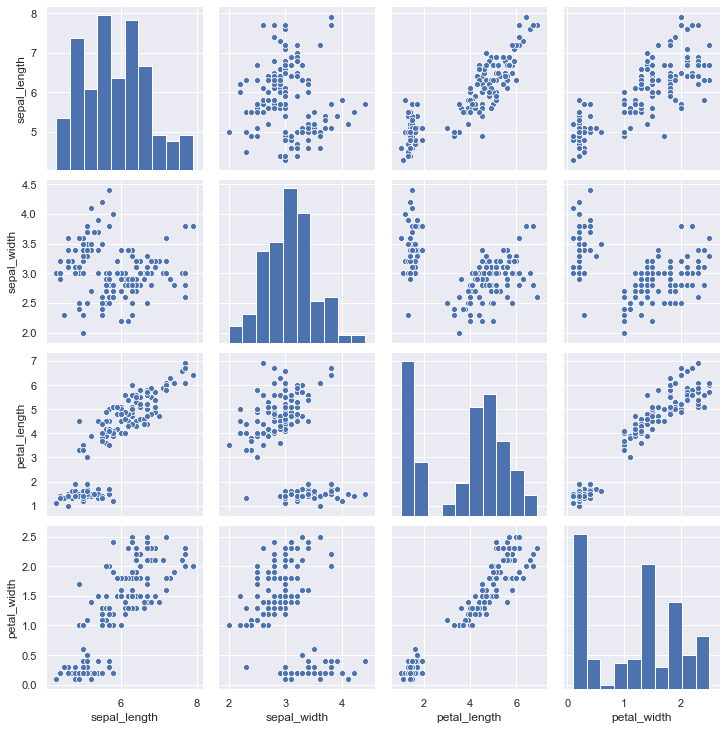

In [5]:
sns.pairplot(data)

Este grafico se puede mejorar, pasándole el argumento __hue__ a la función:

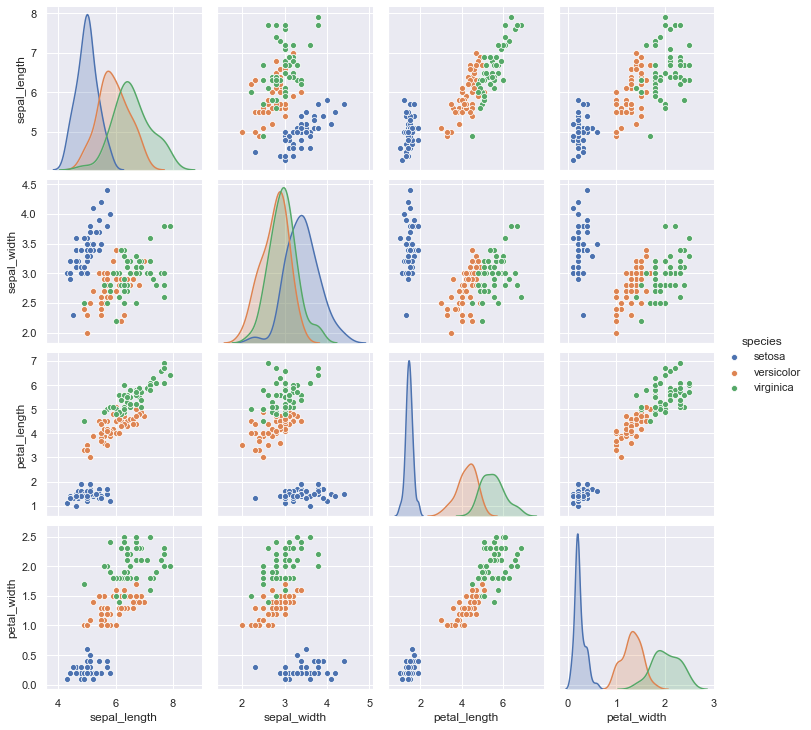

In [6]:
sns.pairplot(data, hue = 'species')

### 1.1 Scatterplot ###

Diagrama de dispersión:

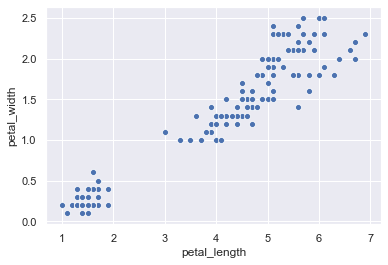

In [7]:
sns.scatterplot(x="petal_length", y="petal_width", data=data)

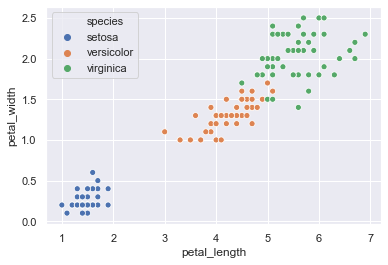

In [8]:
sns.scatterplot(x="petal_length", y="petal_width", hue="species" , data=data)

In [9]:
# Size determina el tamaño de la bolita.
# Hue nos permite agregar una tercer variable.
# Style cambia el simbolito o forma de la tercer variable.

__Ejercicio:__ intenta hacer este mismo gráfico con Matplotlib.

In [10]:
import matplotlib.pyplot as plt

In [11]:
x = data.petal_length

In [12]:
y = data.petal_width

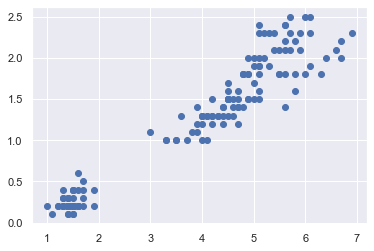

In [13]:
plt.plot(x, y, 'o')

### 1.2 Histogramas ###

El gráfico del ejemplo, en realidad es una distribución de probabilidad, no un histograma.

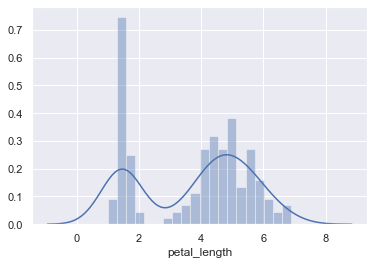

In [14]:
sns.distplot(data['petal_length'], bins = 20) # Por default incluye el KDE.

__Ejercicio:__ Modificar los siguientes argumentos de la función distplot y observar qué hacen: hist,kde (prestar atención a la escala en el eje y) y rug.

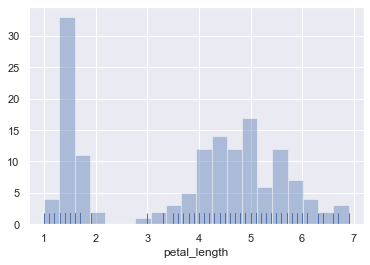

In [15]:
sns.distplot(data['petal_length'], bins = 20, kde = False, hist = True, rug = True) 

In [16]:
# Rug son las rayitas de abajo. Si están cerca hay menos dispersión entre variables y viceversa.

In [17]:
# Hist es para poner el histograma o no.

In [18]:
# Kde aproxima la distribución de datos.

## 2. Categorical Plots ##

Los categorical plots son gráficos donde una de las variables a graficar es de tipo categórica.

Una función útil para contar las diferentes etiquetas de una variable categórica es countplot:

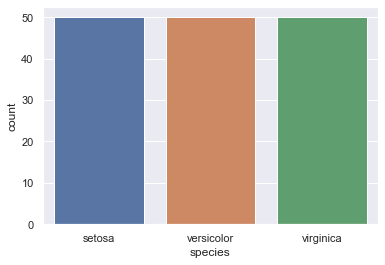

In [19]:
sns.countplot(data = data, x = "species")

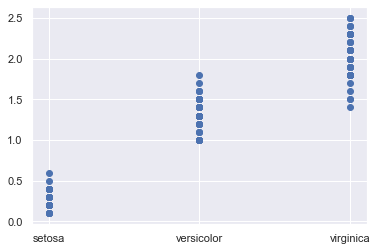

In [20]:
especie = data['species']
ancho_petalo = data['petal_width']
plt.scatter(especie,ancho_petalo)

## Challenge: ##  
__Ejercicio 1__  
1-Realizar con Seaborn un gráfico del largo del pétalo según la especie.    
2-Realizar el mismo gráfico, pero ahora como gráfico de barras. Pista: ver el parametro __kind__ de la función __catplot__ o la función __barplot.__          
3-¿Que representan las barritas negras?  
4-Averiguar la utilidad de los parámetros __ci__ y __estimator__.

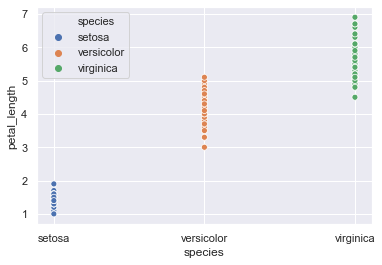

In [21]:
sns.scatterplot(x="species", y="petal_length", hue="species" , data=data) # 1

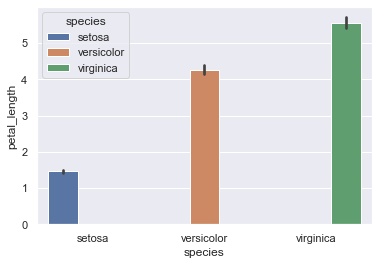

In [22]:
sns.barplot(x="species", y="petal_length", hue="species" , data=data) # 2

In [23]:
# El barplot indica cuál es el MAXIMO.

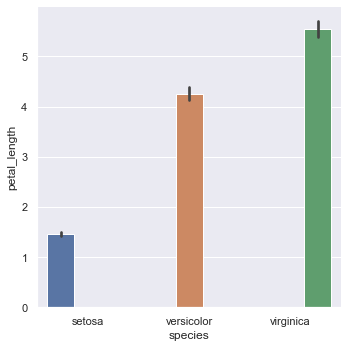

In [24]:
sns.catplot(x="species", y="petal_length", hue="species", kind="bar" , data=data) # 2

La función a nivel de figura __seaborn.catplot__ con el argumento __kind = "bar"__ o la función a nivel de ejes __seaborn.barplot__ generan gráficos de barras que tienen un comportamiento ligeramente diferente al habitual: aplican una función que calcula una medida de tendencia central (por defecto es el valor medio) y muestran, aplicando bootstrapping, el intervalo de confianza del 95% para dicha medida.

Vemos en la parte superior de cada barra el intervalo del 95% de confianza para la medida de tendencia central calculada. __# 3__

Tal y como ocurría con los gráficos de líneas con agregación, el parámetro __ci (confidence interval)__ controla esta opción:

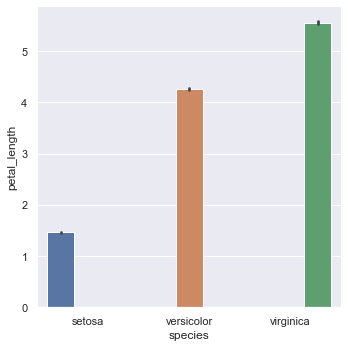

In [25]:
sns.catplot(x="species", y="petal_length", hue="species", kind="bar" , data=data, ci = 30) # 4

En el caso de que seaborn no sea capaz de inferir cuál es la variable categórica, siempre es posible establecer el valor del parámetro __orient__.
Podemos determinar la función a utilizar con el parámetro __estimator__.

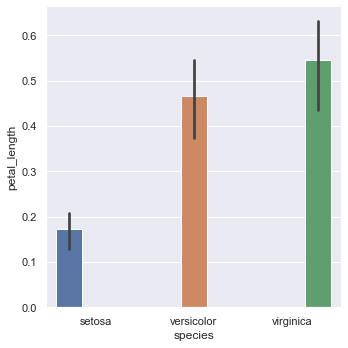

In [26]:
sns.catplot(x="species", y="petal_length", hue="species", kind="bar" , data=data, estimator = np.std)

__Ejercicio 2:__  Escribí tres listas con los tipos de gráficos apropiados a cada consigna:  
1. Gráficos apropiados para obtener la distribución de una variable numérica. __Histograma__  
2. Gráficos apropiados para obtener la distribución de una variable categórica. __Barras__  
3. Gráficos apropiados para obtener la relación entre dos variables numéricas x e y. __Caja__ En realidad era __Scaterplot__.

__Histograma:__ Cantidad Exacta de Café en paquetes de 250 grs. (20 unidades de medida).

In [27]:
cafe = pd.read_csv('Data\DS_Bitácora_07_Cafe.csv')

In [28]:
cafe

,Id,Gramos,Marca
0,1,253,La_virginia
1,2,243,La_virginia
2,3,248,La_virginia
3,4,249,La_virginia
4,5,252,La_virginia
5,6,243,La_virginia
6,7,245,La_virginia
7,8,248,La_virginia
8,9,244,La_virginia
9,10,245,La_virginia


Text(0.5, 1.0, 'Cantidad Exacta de Café en paquetes de 250 grs')

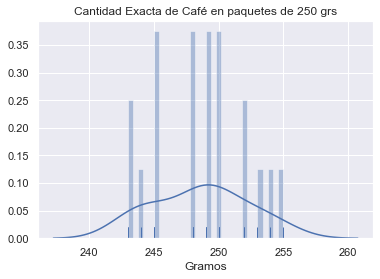

In [29]:
sns.distplot(cafe['Gramos'], bins = 30,  kde = True, hist = True, rug = True) # 1
plt.title('Cantidad Exacta de Café en paquetes de 250 grs')

Text(0.5, 1.0, 'Cantidad Exacta de Café en paquetes de 250 grs para las distintas Marcas')

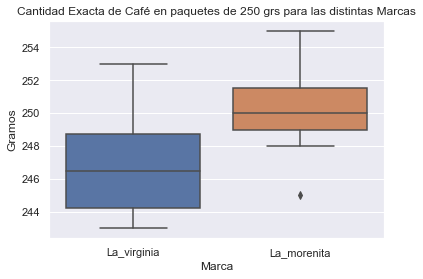

In [30]:
sns.boxplot(data = cafe, x = 'Marca', y = "Gramos") # 3
plt.title('Cantidad Exacta de Café en paquetes de 250 grs para las distintas Marcas')

In [31]:
alumnos = pd.read_csv('Data\DS_Bitácora_07_Alumnos.csv')

Text(0.5, 1.0, 'Alumnos Graduados por Carrera en Ciencias Económicas')

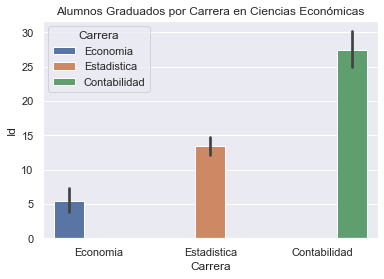

In [32]:
sns.barplot(x="Carrera", y="Id", hue="Carrera" , data=alumnos) #2
plt.title('Alumnos Graduados por Carrera en Ciencias Económicas')